Homework8 Name: Jingyue Zhang Student ID:7529916982 Github username：jingyuezzz

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
import os
os.environ['PYTHONWARNINGS'] = 'ignore'
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('../data/wdbc.data', header = None, delimiter=',')
columns = ['ID', 'class']
for i in range(1, 31):
    columns.append('f'+str(i))
data.columns = columns
data = data.iloc[:,1:]
data['class'] = data['class'].replace(['B','M'], [0,1])
data_B = data.loc[data['class'] == 0]
data_M = data.loc[data['class'] == 1]

(b)i

In [4]:
def score(y, y_pred):
    accuracy = accuracy_score(y,y_pred)
    precision = precision_score(y, y_pred, average='binary')
    recall = recall_score(y, y_pred, average='binary')
    fscore = f1_score(y, y_pred, average='binary')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
    AUC = metrics.auc(fpr, tpr)
    result = pd.Series([accuracy,precision,recall,fscore,AUC])
    return(result)

In [5]:
def plot_matrix(y,y_pred,test_or_train):
                fpr, tpr, thresholds = metrics.roc_curve(y_true = y,y_score=y_pred,pos_label=1)
                plt.plot(fpr, tpr)
                plt.title(test_or_train+" ROC Curve")
                plt.show()
                confusion_matrix_training = confusion_matrix(y_true = y, y_pred = y_pred)
                print('Confusion Matrix:')
                print(confusion_matrix_training)

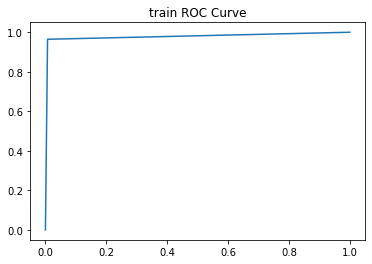

Confusion Matrix:
[[283   2]
 [  6 163]]


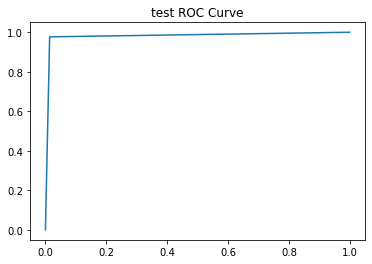

Confusion Matrix:
[[71  1]
 [ 1 42]]


In [6]:
c_range = [10**c for c in np.arange(-3,2, dtype=float)]
train_res_list = []
test_res_list = []
for M in range(0,30):
            train_M, test_M = train_test_split(data_M, test_size=0.2)
            train_B, test_B = train_test_split(data_B, test_size=0.2)
            data_train = train_M.append(train_B).reset_index(drop=True)
            data_test = test_M.append(test_B).reset_index(drop=True)
            x_train = data_train.iloc[:, 1:]
            y_train = data_train.iloc[:, 0]
            x_test = data_test.iloc[:, 1:]
            y_test = data_test.iloc[:, 0]
            x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_train))
            x_train_norm.columns = x_train.columns
            x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_test))
            x_test_norm.columns = x_test.columns

            clf = LinearSVC(penalty='l1',dual=False)
            params = {'C':c_range}
            cv = GridSearchCV(clf, params, n_jobs=-1, cv=5)
            cv.fit(x_train_norm, y_train)
            y_pred_train= cv.predict(x_train_norm)
            y_pred_test= cv.predict(x_test_norm)
            train_result = score(y_train, y_pred_train)
            test_result = score(y_test, y_pred_test)
            train_res_list.append(train_result)
            test_res_list.append(test_result)
            if M==1:
                plot_matrix(y_train, y_pred_train,'train')
                plot_matrix(y_test, y_pred_test,'test')
                
           
            

In [7]:
train_result = pd.concat(train_res_list, axis=1).T
test_result = pd.concat(test_res_list, axis=1).T
result_column = ['accuracy', 'precision', 'recall', 'fscore', 'AUC']
train_result.columns = result_column 
test_result.columns = result_column 

train_result = train_result.mean(axis=0)
print("train result:")
print(train_result)
test_result = test_result.mean(axis=0)
print("test result:")
print(test_result)


train result:
accuracy     0.984508
precision    0.991935
recall       0.966272
fscore       0.978916
AUC          0.980797
dtype: float64
test result:
accuracy     0.893623
precision    0.812571
recall       0.986047
fscore       0.883032
AUC          0.912236
dtype: float64


(b)ii

A

In [8]:
train_M, test_M = train_test_split(data_M, test_size=0.2)
train_B, test_B = train_test_split(data_B, test_size=0.2)
data_train = train_M.append(train_B).reset_index(drop=True)
data_test = test_M.append(test_B).reset_index(drop=True)

M_labeled, M_unlabeled = train_test_split(train_M, test_size=0.5)
B_labeled, B_unlabeled = train_test_split(train_B, test_size=0.5)
labeled = M_labeled.append(B_labeled).reset_index(drop=True)
unlabeled = M_unlabeled.append(B_unlabeled).reset_index(drop=True)

In [9]:
x_labeled = labeled.iloc[:, 1:]
y_labeled = labeled.iloc[:, 0]
x_labeled_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_labeled))
clf = LinearSVC(penalty='l1', dual=False)
params = {'C':c_range}
cv = GridSearchCV(clf, params, n_jobs=-1, cv=5)
cv.fit(x_labeled_norm, y_labeled)
best_c = cv.best_params_['C']
best_c

1.0

B

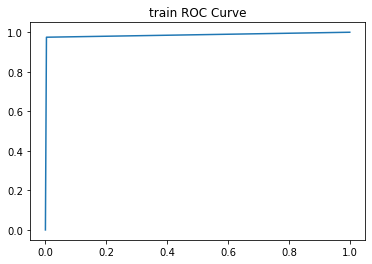

Confusion Matrix:
[[294   1]
 [  4 155]]


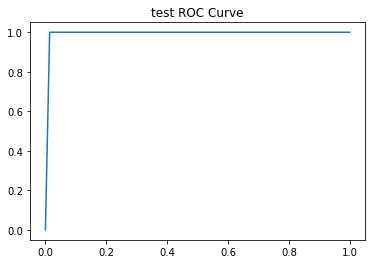

Confusion Matrix:
[[71  1]
 [ 0 43]]


In [37]:
train_res_list = []
test_res_list = []
for M in range(0,30):
    train_M, test_M = train_test_split(data_M, test_size=0.2)
    train_B, test_B = train_test_split(data_B, test_size=0.2)
    data_train = train_M.append(train_B).reset_index(drop=True)
    data_test = test_M.append(test_B).reset_index(drop=True)
    M_labeled, M_unlabeled = train_test_split(train_M, test_size=0.5)
    B_labeled, B_unlabeled = train_test_split(train_B, test_size=0.5)
    labeled = M_labeled.append(B_labeled).reset_index(drop=True)
    unlabeled = M_unlabeled.append(B_unlabeled).reset_index(drop=True)
    x_labeled = labeled.iloc[:, 1:]
    y_labeled = labeled.iloc[:, 0]
    x_unlabeled = unlabeled.iloc[:, 1:]
    y_unlabeled = unlabeled.iloc[:, 0]
    x_test = data_test.iloc[:, 1:]
    y_test = data_test.iloc[:, 0]
    x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_test))
    x_labeled_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_labeled))
    x_unlabeled_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_unlabeled))
    clf = LinearSVC(penalty='l1', dual=False)
    params = {'C':c_range}
    cv = GridSearchCV(clf, params, n_jobs=-1, cv=5)
    cv.fit(x_labeled_norm, y_labeled)
       
    while len(x_unlabeled_norm)>0:
        y_unlabeled_pred = cv.predict(x_unlabeled_norm)
        distance = cv.decision_function(x_unlabeled_norm)
        dis_abs = abs(distance)
        x = list(range(len(abs(distance))))
        dis_dict = {k: v for k, v in zip(x,dis_abs)}
        farthest = list(dis_dict.keys())[list(dis_dict.values()).index(max(dis_dict.values()))]
        y_new = y_unlabeled_pred[farthest]
        X_new = x_unlabeled_norm.iloc[farthest, :]
        x_labeled_norm= x_labeled_norm.append(X_new).reset_index(drop = True)
        y_labeled = y_labeled.append(pd.Series(y_new)).reset_index(drop = True)
        x_unlabeled_norm= x_unlabeled_norm.drop(index=[farthest]).reset_index(drop = True)
        y_unlabeled = y_unlabeled.drop(index=[farthest]).reset_index(drop = True)

    cv.fit(x_labeled_norm,y_labeled)
    y_pred_train= cv.predict(x_labeled_norm)
    y_pred_test= cv.predict(x_test_norm)
    train_result = score(y_labeled, y_pred_train)
    test_result = score(y_test, y_pred_test)
    train_res_list.append(train_result)
    test_res_list.append(test_result)
    if M==1:
                plot_matrix(y_labeled, y_pred_train,'train')
                plot_matrix(y_test, y_pred_test,'test')
           
            

In [38]:
train_result = pd.concat(train_res_list, axis=1).T
test_result = pd.concat(test_res_list, axis=1).T
result_column = ['accuracy', 'precision', 'recall', 'fscore', 'AUC']
train_result.columns = result_column 
test_result.columns = result_column 

train_result = train_result.mean(axis=0)
print("train result:")
print(train_result)
test_result = test_result.mean(axis=0)
print("test result:")
print(test_result)

train result:
accuracy     0.990015
precision    0.994482
recall       0.978660
fscore       0.986473
AUC          0.987662
dtype: float64
test result:
accuracy     0.920290
precision    0.883569
recall       0.948062
fscore       0.905286
AUC          0.925883
dtype: float64


iii A

 we need to run kmeans randomly to avoid local minimum. I randomizing the initialization parameters and running the for many times to avoid.

In [91]:
    train_M, test_M = train_test_split(data_M, test_size=0.2)
    train_B, test_B = train_test_split(data_B, test_size=0.2)
    data_train = train_M.append(train_B).reset_index(drop=True)
    data_test = test_M.append(test_B).reset_index(drop=True)
    x_train = data_train.iloc[:, 1:]
    y_train = data_train.iloc[:, 0]
    x_test = data_test.iloc[:, 1:]
    y_test = data_test.iloc[:, 0]
    x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_train))
    x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_test))
    for i in range(0,30):
        kmeans_model = KMeans(n_clusters=2,init = 'random').fit(x_train)

B

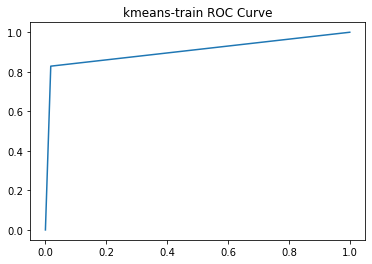

Confusion Matrix:
[[280   5]
 [ 29 140]]


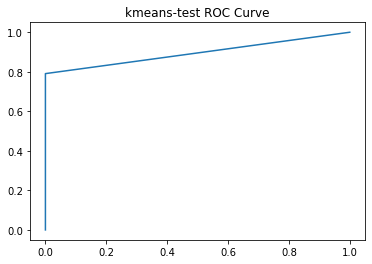

Confusion Matrix:
[[72  0]
 [ 9 34]]


In [95]:
kmeans_score = []
test_score = []
for M in range(0,30):
    train_M, test_M = train_test_split(data_M, test_size=0.2)
    train_B, test_B = train_test_split(data_B, test_size=0.2)
    data_train = train_M.append(train_B).reset_index(drop=True)
    data_test = test_M.append(test_B).reset_index(drop=True)
    x_train = data_train.iloc[:, 1:]
    y_train = data_train.iloc[:, 0]
    x_test = data_test.iloc[:, 1:]
    y_test = data_test.iloc[:, 0]
    x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_train))
    x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_test))
    
    kmeans = KMeans(n_clusters = 2, init = 'random').fit(x_train_norm)
    center_distance = kmeans.transform(x_train_norm)
    center_distance = pd.DataFrame(data=center_distance, index=x_train_norm.index)
    close_0 = center_distance.sort_values(0).index.values[0:30]
    close_1 = center_distance.sort_values(1).index.values[0:30]
    close_0_true_label  = y_train.iloc[close_0].mode()
    close_1_true_label  = y_train.iloc[close_1].mode()
    kmeans_labels = pd.DataFrame(data = kmeans.labels_)
    kmeans_labels = kmeans_labels.replace(to_replace = 0, value = close_0_true_label[0])
    kmeans_labels = kmeans_labels.replace(to_replace = 1, value = close_1_true_label[0])
    kmeans_result = score(y_train,kmeans_labels)
    kmeans_score.append(kmeans_result)
    if M==1:
                plot_matrix(y_train,kmeans_labels,'kmeans-train')
    #test
    test_labels = pd.DataFrame(data =kmeans.predict(x_test_norm))
    test_labels = test_labels.replace(to_replace = 0, value = close_0_true_label[0])
    test_labels = test_labels.replace(to_replace = 1, value = close_1_true_label[0])
    test_result = score(y_test,test_labels)
    test_score.append(test_result)
    if M==1:
                plot_matrix(y_test,test_labels,'kmeans-test')


In [97]:
kmeans_result =pd.concat(kmeans_score, axis=1).T
result_column = ['accuracy', 'precision', 'recall', 'fscore', 'AUC']
kmeans_result.columns = result_column 
kmeans_result = kmeans_result.mean(axis=0)
print("kmeans result:")
print(kmeans_result)

kmeans result:
accuracy     0.785977
precision    0.506580
recall       0.448915
fscore       0.475922
AUC          0.717382
dtype: float64


C

In [98]:
test_result =pd.concat(test_score, axis=1).T
result_column = ['accuracy', 'precision', 'recall', 'fscore', 'AUC']
test_result.columns = result_column 
test_result = test_result.mean(axis=0)
print("kmeans test result:")
print(test_result)

kmeans test result:
accuracy     0.784638
precision    0.479102
recall       0.480620
fscore       0.479005
AUC          0.723412
dtype: float64


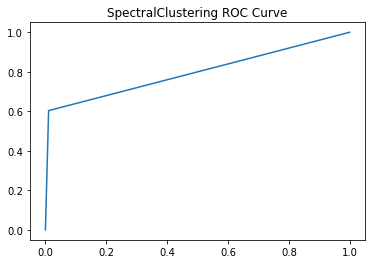

Confusion Matrix:
[[282   3]
 [ 67 102]]


In [104]:
from sklearn.cluster import SpectralClustering
sc_score = []
test_score = []
for M in range(0,30):
    train_M, test_M = train_test_split(data_M, test_size=0.2)
    train_B, test_B = train_test_split(data_B, test_size=0.2)
    data_train = train_M.append(train_B).reset_index(drop=True)
    data_test = test_M.append(test_B).reset_index(drop=True)
    x_train = data_train.iloc[:, 1:]
    y_train = data_train.iloc[:, 0]
    x_test = data_test.iloc[:, 1:]
    y_test = data_test.iloc[:, 0]
    x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_train))
    x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(x_test))
    
    train_labels= SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit_predict(x_train_norm)
    train_labels = pd.DataFrame(data=train_labels, index=x_train_norm.index)
    train_label_0 = train_labels[train_labels[0] == 0]
    train_label_1 = train_labels[train_labels[0] == 1]
    train_label_0index = train_label_0.index.values
    train_label_1index = train_label_1.index.values
    
    y_label_0 = y_train.loc[train_label_0index]
    y_label_1 = y_train.loc[train_label_1index]
    true_label_0  = y_label_0.mode()
    true_label_1  = y_label_1.mode()
    train_labels = train_labels.replace(to_replace = 0, value = true_label_0[0])
    train_labels = train_labels.replace(to_replace = 1, value = true_label_1[0])
    sc_result = score(y_train,train_labels)
    sc_score.append(sc_result)
    if M==1:
                plot_matrix(y_train,train_labels,'SpectralClustering')
  
    






In [105]:
sc_result =pd.concat(sc_score, axis=1).T
result_column = ['accuracy', 'precision', 'recall', 'fscore', 'AUC']
sc_result.columns = result_column 
sc_result = sc_result.mean(axis=0)
print("sc test result:")
print(sc_result)

sc test result:
accuracy     0.836711
precision    0.883114
recall       0.572387
fscore       0.694056
AUC          0.782918
dtype: float64


v.

According to the accuracy and precision scores from previous tasks, supervised learning is better than that from semi-supervised learning,semi-supervised learning shows better result than unsupervised learning. The accuracy from unsupervised learning is lower than 0.8, I think it underperforms.


2

In [122]:
data = pd.read_csv('../data/data_banknote_authentication.txt', header = None)
data_y = data.iloc[:,4]
data_x = data.drop(columns = 4)
train_data, test_data = train_test_split(data, test_size = 472)
y_train = train_data.iloc[:,4]
x_train = train_data.drop(columns = 4)
y_test = test_data.iloc[:,4]
x_test = test_data.drop(columns = 4)



b(i)

In [152]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.344)
errors_list = []
for i in range (0,50):
    train_x_2 = train_x
    testerrors = []
    sample_train_x = train_x_2.sample(0)
    while len(train_x_2) > 0:
        newsample = train_x_2.sample(10)
        sample_train_x = pd.concat([sample_train_x, newsample])
        sample_train_y = train_y.loc[sample_train_x.index]
        traindf2 = train_x_2.drop(index = newsample.index)
        svm_model = LinearSVC(penalty = 'l1', dual = False, max_iter = 10000)
        svm_model.fit(sample_train_x, sample_train_y)
        params = {'C':c_range}
        gridsearch = GridSearchCV(svm_model, param_grid = params, n_jobs = -1, cv=5)
        gridsearch.fit(sample_train_x, sample_train_y)
        bestsvm = gridsearch.best_estimator_
        testerror = bestsvm.score(test_x, test_y)
        testerrors.append(testerror)

    errors_list.append(testerrors)

In [177]:
for list in errors_list:
    for i in range(len(list)):
          list[i] = 1-list[i]

b(ii)

In [190]:
errors_list_active = []

for i in range(0,50):
    train_x_2 = train_x
    testerrors2 = []
    length_2 = []
    sample_train_x2 = train_x_2.sample(10)
    sample_train_y2 = train_y.loc[sample_train_x2.index]
    svm3 = LinearSVC(penalty = 'l1', dual = False, max_iter = 10000)
    svm3.fit(sample_train_x2, sample_train_y2)
    params = {'C':c_range}
    cv2 = GridSearchCV(svm3, param_grid = params, n_jobs = -1, cv=5)
    cv2.fit(sample_train_x2, sample_train_y2)
    bestsvm2 = cv2.best_estimator_

    while len(train_x_2) > 0:
        svm_deci = bestsvm2.decision_function(train_x_2)
        svm_deci = np.absolute(svm_deci)
        svm_deci = pd.DataFrame(data = svm_deci, index = train_x_2.index)
        svm_deci = svm_deci.sort_values(by=[0], axis=0)
        new_sample = svm_deci.iloc[0:10]
        indices = new_sample.index.values
        new_x = train_x_2.loc[indices]
        sample_train_x2 = pd.concat([sample_train_x2, new_x])
        sample_train_y2 = train_y.loc[sample_train_x2.index]
        train_x_2 = train_x_2.drop(index = new_x.index)
        svm3 = LinearSVC(penalty = 'l1', dual = False, max_iter = 10000)
        svm3.fit(sample_train_x2, sample_train_y2)
        cv2 = GridSearchCV(svm3, param_grid = params, n_jobs = -1, cv=5)
        cv2.fit(sample_train_x2, sample_train_y2)
        bestsvm2 = cv2.best_estimator_
        test_error2 = 1-bestsvm2.score(test_x, test_y)
        testerrors2.append(test_error2)
        length = len(sample_train_x2)
        length_2.append(length)
    errors_list_active.append(testerrors2)

b(iii)

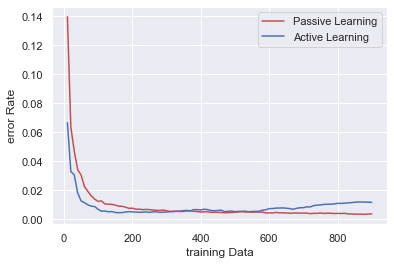

In [207]:
test_error_points = range(10, 901, 10)
mean_pass = pd.DataFrame(errors_list).mean()
mean_active = pd.DataFrame(errors_list_active).mean()
plt.plot(test_error_points, mean_pass , c='r',label='Passive Learning')
plt.plot(test_error_points, mean_active, c='b', label='Active Learning')
plt.xlabel('training Data')
plt.ylabel('error Rate')
plt.legend()
plt.show()


When the size of dataset is small, the active learning achieve better than passive learning. If the size is large, passive learning is better.